In [194]:
import numpy as np

train_file = "D:\\cd_data_C\\Desktop\\Lab_Python\\Lab 2\\public_data\\train\\train.npz"

# Loads the training data from the .npz file.
train_data = np.load(train_file)

# Extracts the features from the training data.
x_train = train_data['X_train'][:-250]

# Extracts the labels from the training data.
y_train = train_data['y_train'][:-250]

In [195]:
print(x_train.shape)
print(y_train.shape)

(550, 100)
(550,)


In [159]:
for i in range(100): 
  print(np.min(x_train[:, i]), np.max(x_train[:, i]))

-2.8106283166180837 2.8241670094027294
-2.78519878195651 2.748782415910065
-2.690275631353535 3.536531654873366
-2.911549919320649 2.9452462899351
-2.7475048427252347 2.721912147906493
-6.839600150807803 4.176872176299632
-5.595500524653065 5.173763017823601
-3.327995360156236 3.471549476805477
-4.576356387185721 5.324896422314157
-5.643058874153653 6.365329589853956
-4.959804328588518 5.7543533098903765
-4.576356387185721 5.324896422314157
-2.5476066726620523 3.120976620705856
-5.092933855756296 6.321504604292656
-3.9224002516183423 2.93032028549251
-5.701772489456799 7.501492222273618
-2.7691765652335416 3.401875562209925
-2.653379100182451 2.9566916332265496
-5.595500524653065 5.173763017823601
-5.498127123322848 6.06498264321694
-3.081142823776587 3.9262377064363267
-2.7414170608291726 3.284118201287884
-6.059572348399323 5.427399492923733
-2.83303029014274 2.6688827582232557
-3.408274589327025 3.852731490654721
-5.515533400704654 5.636855831220316
-3.2210163559857135 3.60241502421

In [196]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

# Assuming X_train is your feature matrix
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

# Keep enough components to retain 95% of the variance
pca = LinearDiscriminantAnalysis()
x_reduce = pca.fit_transform(x_train, y_train) 

In [198]:
x_reduce.shape

(550, 1)

In [197]:
import matplotlib.pyplot as plt

for d in range(2): 
  # Create scatter plot and use 'c' argument to color by class
  plt.scatter(x_reduce[:, d], x_reduce[:, (d+1) % 2], c=y_train, cmap='viridis')  # 'c' for class, 'cmap' for color map

  # Add colorbar to show class correspondence
  plt.colorbar(label='Class')

  # Add labels and title
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.title('Scatter Plot with Classes')

  # Show the plot
  plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

Explained Variance Ratio:  (10,)
Cumulative Variance:  (10,)


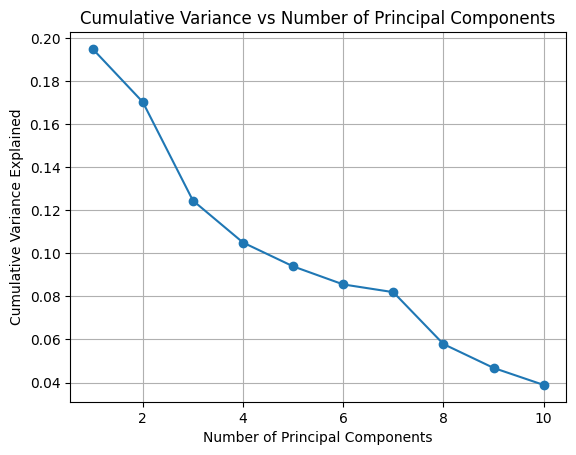

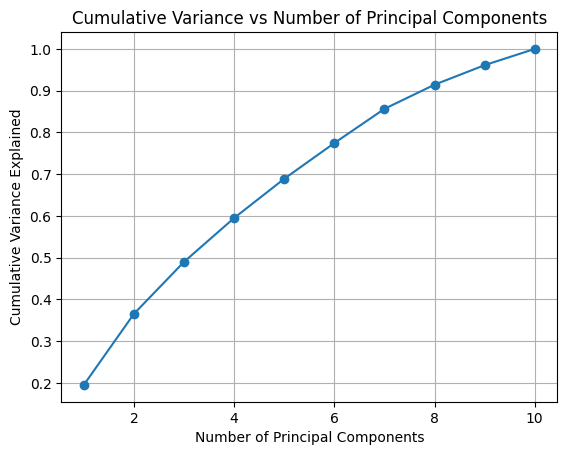

In [55]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming data is a list of vectors (a 2D array)
data = np.array(x_reduce)

# Perform PCA
pca = PCA()
pca.fit(data)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio: ", explained_variance.shape)
print("Cumulative Variance: ", cumulative_variance.shape)

import matplotlib.pyplot as plt

# Plot cumulative variance
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
# plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

# plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance vs Number of Principal Components')
plt.grid(True)
plt.show()

In [64]:
from scipy.spatial import distance_matrix
import numpy as np

def box_counting_dimension(data, eps=1e-5):
    # Create distance matrix
    D = distance_matrix(data, data)

    # Distance threshold (epsilon) for box-counting
    eps_range = np.logspace(-3, 0, num=10)  # You can adjust the range

    N_eps = []  # Number of boxes that contain points
    for eps in eps_range:
        N_eps.append(np.sum(np.min(D, axis=1) <= eps))

    # Fit a line to log(N) vs log(1/epsilon)
    coeffs = np.polyfit(np.log(1 / eps_range), np.log(N_eps), 1)
    return coeffs[0]  # Fractal dimension estimate

fractal_dim = box_counting_dimension(x_reduce)
print(f"Fractal Dimension: {fractal_dim}")

Fractal Dimension: 3.575328754642391e-16


In [63]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming data is a list of vectors (a 2D array)
data = np.array(x_reduce)

# Fit KMeans with an arbitrary number of clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Get cluster labels and compute inertia (sum of squared distances)
inertia = kmeans.inertia_
print(f"KMeans Inertia: {inertia}")


KMeans Inertia: 19904.287148634332


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
from scipy.stats import entropy
import numpy as np

# Assuming data is a list of vectors (a 2D array)
data = np.array(x_reduce)

# Flatten the data and calculate the probability distribution
flattened_data = data.flatten()
value, counts = np.unique(flattened_data, return_counts=True)
prob_dist = counts / counts.sum()

# Calculate entropy
data_entropy = entropy(prob_dist)
print(f"Shannon Entropy: {data_entropy}")


Shannon Entropy: 8.612503371220559


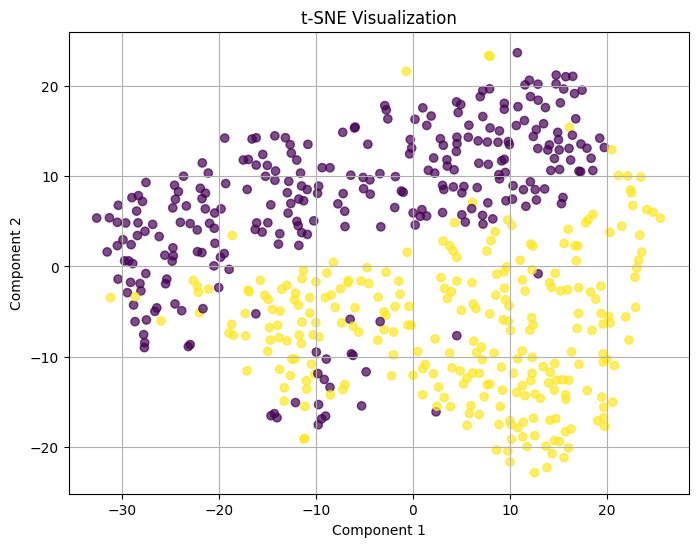

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


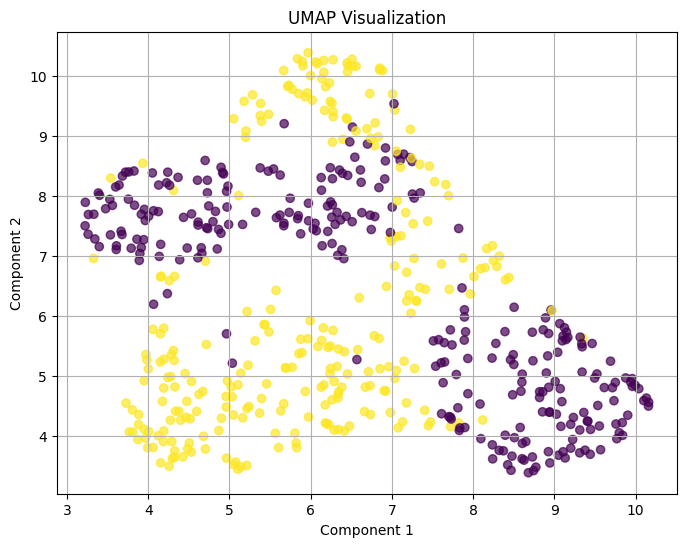

Manifold-Based Complexity (t-SNE): 25.7170
Manifold-Based Complexity (UMAP): 3.7216


In [61]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.manifold import TSNE  
import umap  


data = np.array(x_reduce)

# Function to visualize the embeddings from t-SNE and UMAP  
def plot_embeddings(embeddings, title):  
    plt.figure(figsize=(8, 6))  
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train, alpha=0.7)  
    plt.title(title)  
    plt.xlabel('Component 1')  
    plt.ylabel('Component 2')  
    plt.grid(True)  
    plt.show()  

# t-SNE  
tsne = TSNE(n_components=2, random_state=42)  
tsne_results = tsne.fit_transform(data)  
plot_embeddings(tsne_results, 't-SNE Visualization')  

# UMAP  
umap_model = umap.UMAP(n_components=2, random_state=42)  
umap_results = umap_model.fit_transform(data)  
plot_embeddings(umap_results, 'UMAP Visualization')  

# Optional: Calculate manifold-based complexity  
# This is a simple measure; you might want to refine it  
def manifold_complexity(embeddings):  
    return np.std(embeddings, axis=0).sum()  

tsne_complexity = manifold_complexity(tsne_results)  
umap_complexity = manifold_complexity(umap_results)  

print(f'Manifold-Based Complexity (t-SNE): {tsne_complexity:.4f}')  
print(f'Manifold-Based Complexity (UMAP): {umap_complexity:.4f}')  

In [155]:
# x_reduce, y_reduce = tmp

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


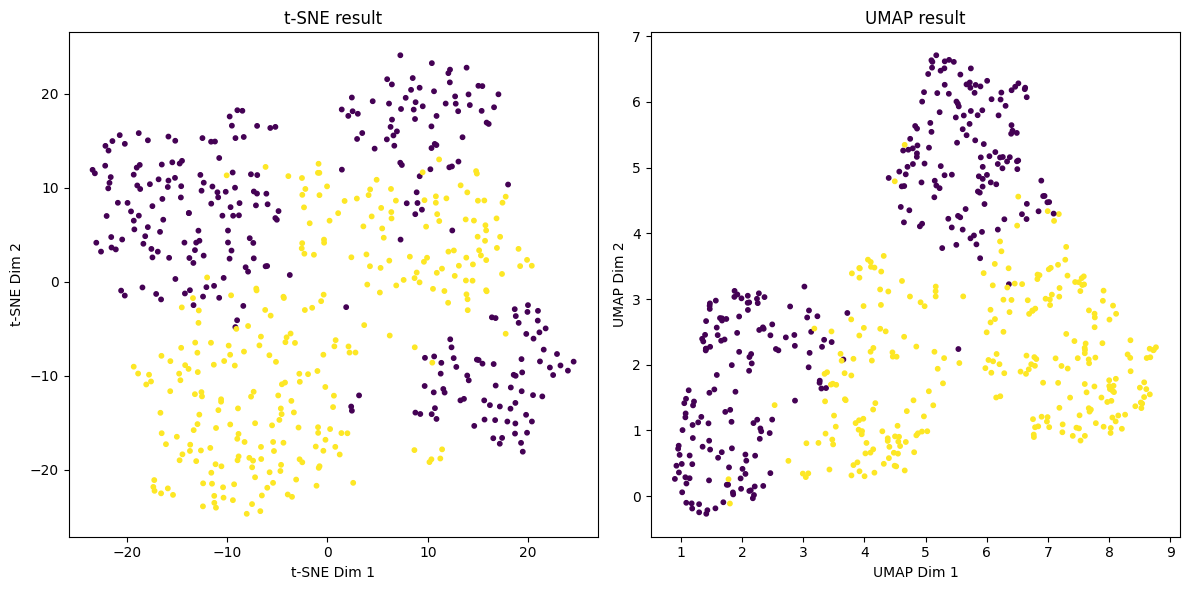

t-SNE Silhouette Score: 0.13436704874038696
UMAP Silhouette Score: 0.24399524927139282
t-SNE Kurtosis: [-1.2353637 -1.0883745]
UMAP Kurtosis: [-1.0783271 -0.6804364]


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import make_blobs

# Create a sample high-dimensional dataset (for demonstration purposes)
# You can replace this with your own dataset
n_samples = 1000
n_features = 50
X, y = np.array(x_reduce), np.array(y_train)

# Manifold Learning with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Manifold Learning with UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plotting the results for t-SNE and UMAP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# t-SNE plot
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
ax1.set_title("t-SNE result")
ax1.set_xlabel("t-SNE Dim 1")
ax1.set_ylabel("t-SNE Dim 2")

# UMAP plot
ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
ax2.set_title("UMAP result")
ax2.set_xlabel("UMAP Dim 1")
ax2.set_ylabel("UMAP Dim 2")

plt.tight_layout()
plt.show()


from sklearn.metrics import silhouette_score

tsne_silhouette = silhouette_score(X_tsne, y)
umap_silhouette = silhouette_score(X_umap, y)

print(f"t-SNE Silhouette Score: {tsne_silhouette}")
print(f"UMAP Silhouette Score: {umap_silhouette}")


from scipy.stats import kurtosis

tsne_kurtosis = kurtosis(X_tsne, axis=0)
umap_kurtosis = kurtosis(X_umap, axis=0)

print(f"t-SNE Kurtosis: {tsne_kurtosis}")
print(f"UMAP Kurtosis: {umap_kurtosis}")


In [199]:
# x_train, y_train = tmp 
tmp = (x_train, y_train)
print(tmp[0].shape, tmp[1].shape)

(550, 100) (550,)


In [201]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix


# Load the dataset  
x_train, y_train = tmp 
X, y = np.array(x_reduce), np.array(y_train)

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier  
model = SVC(kernel='rbf', C=10**0)  # You can choose other kernels like 'rbf', 'poly', etc.  
# Fit the model to the training data  
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data  
y_pred = model.predict(X_test)
# Print the confusion matrix and classification report  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  

print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[50  8]
 [10 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        58
           1       0.84      0.81      0.82        52

    accuracy                           0.84       110
   macro avg       0.84      0.83      0.84       110
weighted avg       0.84      0.84      0.84       110



In [202]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.manifold import TSNE  
import umap  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  

# Create sample data with labels (you should replace this with your actual dataset)  
np.random.seed(42)  
n_samples = 100  
n_features = 50  
n_classes = 3  
x_train, y_train = tmp 
X = x_reduce
y = y_train

# Function to visualize embeddings  
def plot_embeddings(embeddings, labels, title):  
    plt.figure(figsize=(8, 6))  
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)  
    plt.title(title)  
    plt.xlabel('Component 1')  
    plt.ylabel('Component 2')  
    plt.colorbar(scatter, label='Classes')  
    plt.grid(True)  
    plt.show()  

# Train/test split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Function to apply KNN and get accuracy  
def apply_knn(X_train, y_train, X_test, y_test, k=5):  
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    return accuracy  

# t-SNE  
tsne = TSNE(n_components=2, random_state=42)  
X_tsne = tsne.fit_transform(X)  
plot_embeddings(X_tsne, y, 't-SNE Visualization')  

# Apply KNN on the original data  
knn_accuracy_original = apply_knn(X_train, y_train, X_test, y_test, k=5)  
print(f'KNN Accuracy on Original Data: {knn_accuracy_original:.4f}')  

# Apply KNN on t-SNE data  
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)  
knn_accuracy_tsne = apply_knn(X_tsne_train, y_tsne_train, X_tsne_test, y_tsne_test, k=5)  
print(f'KNN Accuracy on t-SNE Data: {knn_accuracy_tsne:.4f}')  

# UMAP  
umap_model = umap.UMAP(n_components=2, random_state=42)  
X_umap = umap_model.fit_transform(X)  
plot_embeddings(X_umap, y, 'UMAP Visualization')  

# Apply KNN on UMAP data  
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)  
knn_accuracy_umap = apply_knn(X_umap_train, y_umap_train, X_umap_test, y_umap_test, k=5)  
print(f'KNN Accuracy on UMAP Data: {knn_accuracy_umap:.4f}')

ValueError: n_components=2 must be between 1 and min(n_samples, n_features)=1 with svd_solver='randomized'

In [203]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

# Load the dataset  
data = load_iris()  
x_train, y_train = tmp
X = np.array(x_reduce)  # Features  
y = np.array(y_reduce)  # Target variable  

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Create a Random Forest classifier  
model = RandomForestClassifier(n_estimators=500, random_state=42)  

# Fit the model to the training data  
model.fit(X_train, y_train)  

# Use the trained model to make predictions on the test data  
y_pred = model.predict(X_test)  

# Print the confusion matrix and classification report  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  

print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[52  6]
 [14 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        58
           1       0.86      0.73      0.79        52

    accuracy                           0.82       110
   macro avg       0.83      0.81      0.82       110
weighted avg       0.82      0.82      0.82       110



In [204]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.metrics import classification_report, confusion_matrix  

# Load the dataset  
# data = load_iris()  
x_train, y_train = tmp
X = x_reduce  # Features  
y = y_train  # Target variable  

# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Create an LDA classifier  
lda = LinearDiscriminantAnalysis()  

# Fit the model to the training data  
lda.fit_transform(X_train, y_train)  

# Use the trained model to make predictions on the test data  
y_pred = lda.predict(X_test)  

# Print the confusion matrix and classification report  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  

print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[50  8]
 [10 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        58
           1       0.84      0.81      0.82        52

    accuracy                           0.84       110
   macro avg       0.84      0.83      0.84       110
weighted avg       0.84      0.84      0.84       110

